<div align="center">
    
# ΠΑΝΕΠΙΣΤΗΜΙΟ ΚΡΗΤΗΣ
# Τμήμα Επιστήμης Υπολογιστών

## HY-370: Ψηφιακή Επεξεργασία Σημάτων
## Χειμερινό Εξάμηνο 2023-2024
### Διδάσκοντες: Γ. Στυλιανού, Γ. Καφεντζής

## Ανάθεση: 10 Νοέμβρη 2023
## Παράδοση: 8 Δεκέμβρη 2023, 23:59:59
(ο τρόπος παράδοσης βρίσκεται στο τέλος του αρχείου αυτού)

In [ ]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy
from pezw2 import pezw2
import scipy.io as io
from IPython.display import Audio      # βιβιοθήκη για να "παίζουμε" ήχους (μεταξύ άλλων)
from scipy import signal
from scipy.io import wavfile
from ECGmake import ECGmake
from matplotlib import patches

Σε αυτή τη σειρά ασκήσεων θα χρησιμοποιήσετε αρκετά μια custom συνάρτηση που ονομάζεται pezw2, η οποία τυπώνει μερικά ενδιαφέροντα γραφήματα σχετικά με μια συνάρτηση μεταφοράς $H(z) = \frac{P(z)}{Q(z)}$.

Δείτε παρακάτω τι κάνει και πως συντάσσεται.

In [ ]:
help(pezw2)

"Ξε-σχολιάστε" τα δυο παραδείγματα και εξετάστε τα γραφήματα ώστε να καταλάβετε περισσότερα.

In [ ]:
#pezw2([1], [1, -0.5])

In [ ]:
#pezw2([1], np.convolve([1, -0.9*np.exp(1j*np.pi/2)], [1, -0.9*np.exp(-1j*np.pi/2)]))

---
---

# 1. Κατανόηση Καθυστέρηση Ομάδας και All-pass Συστημάτων
Ένα all-pass σύστημα δίνεται στο παρακάτω διάγραμμα, για $a=re^{j\theta}$ και $|r|<1$.
<center>
<div>
<img src="Lab5fig1.png" width="600"/>
</div>
Σχήμα 1: All-pass Σύστημα
</center>

Σύμφωνα με τις διαλέξεις, ένα τέτοιο σύστημα θα έχει group delay μορφής:

$$grd[H(e^{j\omega})] = \frac{1 - r^{2}}{|1 - re^{j\theta} e^{-j\omega}|^{2}} = \frac{1 - r^{2}}{1 + r^{2} - 2r \cos (\omega - \theta)}$$

Ακόμα, γνωρίζουμε ότι το group delay του συστήματος θα έχει μέγιστο στο $\omega = \theta$, όπου:

$$\max (grd[H(e^{j\omega})]) = \frac{1 - r^{2}}{1 + r^{2} - 2r\cos(0)} = \frac{1 - r^{2}}{1 + r^{2} -2r} = \frac{(1-r)(1+r)}{(1-r)^2} \Longrightarrow {\max (grd[H(e^{j\omega})]) = \frac{1+r}{1-r}}$$


ii. Τι σημαίνει η τιμή αυτή του group delay στη συγκεκριμένη συχνότητα για ένα "πακέτο" συχνοτήτων στενής ζώνης που εμφανίζεται στην είσοδο? **Απαντήστε παρακάτω**.

<u>**Απάντηση**</u>

---

Δημιουργούμε ένα σήμα με τις παρακάτω εντολές:


In [ ]:
x1 = [np.multiply(np.cos(np.dot((np.pi/4), np.array([i for i in range(0, 301)]))), np.hanning(301))]
x2 = [np.multiply(np.cos(np.dot((np.pi/2), np.array([i for i in range(0, 301)]))), np.hanning(301))]
x = np.hstack([np.zeros((1,300)), x1, x2, np.zeros((1,300))])[0]

Το παραπάνω σήμα έχει δυο ημίτονα στις συχνότητες $\omega_1 = 0.25\pi$ και $\omega_2 = 0.5\pi$, όπως είναι εμφανές, ενώ η διάρκειά τους είναι $301$ δείγματα. Με βάση τις απαντήσεις και τις παρατηρήσεις σας για το all-pass σύστημα νωρίτερα, και χρησιμοποιώντας τη συνάρτηση pezw2.m που σας δίνεται, εκτελέστε τα παρακάτω:

i. Ας τυπώσουμε το γράφημα (εντολή plt.plot) του σήματος $x$.


In [ ]:
fig = plt.figure(figsize=(12,4))
plt.plot(x)
plt.grid(True)
plt.xlabel('Samples')
plt.title("Signal x[n]")
plt.xlim(0, 1400)
plt.ylim(-1.00, 1.00)
plt.show()

ii. Δημιουργήστε ένα πραγματικό all-pass σύστημα το οποίο να μετατοπίζει μόνο το πρώτο ημίτονο κατά $50$ δείγματα.
Βρείτε τους συντελεστές του συστήματος, για αριθμητή και παρονομαστή. Καλέστε τη συνάρτηση pezw2 με κατάλληλα ορίσματα. Περάστε το σήμα σας μέσα από το σύστημα (εντολή sig.lfilter). Τυπώστε (εντολή plt.plot) το αποτέλεσμα της εξόδου.

<u>**Απάντηση**</u>

In [ ]:
r = # INSERT CODE HERE
w = # INSERT CODE HERE

num1 = # INSERT CODE HERE (you can use sig.convolve)
den1 = # INSERT CODE HERE (you can use sig.convolve)

pezw2(num1, den1)

In [ ]:
# Filter and print output
y1 = # INSERT CODE HERE

plt.figure(figsize=(12,4))
plt.plot(y1)
plt.grid(True)
plt.xlabel('Samples')
plt.title('Signal y1[n] (ω=0.25π 50 samples to the right)')
plt.show()

iii. Δημιουργήστε ένα πραγματικό all-pass σύστημα το οποίο να μετατοπίζει μόνο το δεύτερο ημίτονο κατά $50$ δείγματα.
Βρείτε τους συντελεστές του συστήματος, για αριθμητή και παρονομαστή. Καλέστε τη συνάρτηση pezw2 με κατάλληλα ορίσματα. Περάστε το σήμα σας μέσα από το σύστημα (εντολή sig.lfilter). Τυπώστε (εντολή plt.plot) το αποτέλεσμα της εξόδου.

<u>**Απάντηση**</u>

In [ ]:
r = # INSERT CODE HERE
w = # INSERT CODE HERE

num2 = # INSERT CODE HERE (you can use sig.convolve)
den2 = # INSERT CODE HERE (you can use sig.convolve)

pezw2(num2, den2)

In [ ]:
# Filter and print output
y2 = # INSERT CODE HERE

plt.figure(figsize=(12,4))
plt.plot(y2)
plt.grid(True)
plt.xlabel('Samples')
plt.title('Signal y2[n] (ω=0.5π 50 samples to the right)')
plt.show()

iv. Δημιουργήστε ένα πραγματικό all-pass σύστημα το οποίο να μετατοπίζει και τα δυο ημίτονα κατά $50$ δείγματα.
Βρείτε τους συντελεστές του συστήματος, για αριθμητή και παρονομαστή. Καλέστε τη συνάρτηση pezw2 με κατάλληλα ορίσματα. Περάστε το σήμα σας μέσα από το σύστημα (εντολή sig.lfilter). Τυπώστε (εντολή plt.plot) το αποτέλεσμα της εξόδου.

<u>**Απάντηση**</u>

In [ ]:
r = # INSERT CODE HERE
w1 = # INSERT CODE HERE
w2 = # INSERT CODE HERE

B1 = # INSERT CODE HERE (you can use sig.convolve)
B2 = # INSERT CODE HERE (you can use sig.convolve)
num3 = sig.convolve(B1, B2)

A1 = # INSERT CODE HERE (you can use sig.convolve)
A2 = # INSERT CODE HERE (you can use sig.convolve)
den3 = sig.convolve(A1, A2)

pezw2(num3, den3)

In [ ]:
# Filter and print output
y3 = # INSERT CODE HERE

plt.figure(figsize=(12,4))
plt.plot(y3)
plt.grid(True)
plt.xlabel('Samples')
plt.title('Signal y3[n] (ω=0.25π and ω=0.5π 50 samples to the right')
plt.show()

v. Υπάρχει πιο απλός τρόπος να μετατοπίσετε και τις δυο συχνότητες, δηλ. όλο το σήμα, κατά $50$ δείγματα με ένα πιο απλό και πιο ακριβές σύστημα? Ποιό είναι αυτό? Γράψτε τη σχέση που χαρακτηρίζει το σύστημα στο χώρο του Ζ και καλέστε την pezw2 για να επιβεβαιώσετε τη λύση σας.

<u>**Απάντηση**</u>


In [ ]:
num4 = # INSERT CODE HERE
den4 = # INSERT CODE HERE

# Group delay is problematic here as a visualization - do not worry
pezw2(num4, den4)

In [ ]:
# Filter and print output
y4 = # INSERT CODE HERE

plt.figure(figsize=(12,4))
plt.plot(y4)
plt.grid(True)
plt.xlabel('Samples')
plt.title('Signal y4[n] (ω=0.25π and ω=0.5π 50 samples to the right)')
plt.show()

---
---

# 2. Φιλτράρισμα Μηδενικής Φάσης
(α') Γνωρίζετε από τη θεωρία σας ότι όταν περνάμε ένα σήμα μέσα από ένα ΓΧΑ σύστημα, τότε το μεταβάλλουμε κατά πλάτος και κατά φάση. Ο σχεδιασμός ενός συστήματος (φίλτρου, στο εξής) εστιάζεται κυρίως στην αλλαγή του φάσματος πλάτους του σήματος εισόδου, χωρίς να δίνεται ιδιαίτερη βαρύτητα στην αλλαγή της φάσης του. Παρ'όλα αυτά, υπάρχουν δυο στρατηγικές για να αποφύγουμε την αλλαγή φάσης του σήματος εισόδου, ακόμα κι όταν το φίλτρο μας δεν είναι μηδενικής ή σταθερής φάσης.

<center>
<div>
<img src="strat2.png" width="1000"/>
</div>
Σχήμα 2: Στρατηγική 1
</center>

Για κάθε μια από αυτές, βρείτε την **συνολική** κρουστική απόκριση $h_i[n]$, $i=1,2$, που συνδέει την είσοδο $x[n]$ με την έξοδο $y[n]$ και **δείξτε ότι έχει μηδενική φάση ή σταθερή φάση $\theta = \pm \pi$.** 

Στην προσπάθειά σας, **συνίσταται θερμά να μετατρέψετε τις εξισώσεις στο χρόνο στο χώρο του μετασχ. Fourier**.

Η πρώτη στρατηγική φαίνεται στο Σχήμα 2, ενώ η δεύτερη στο Σχήμα 3.

<center>
<div>
<img src="strat1.png" width="1000"/>
</div>
Σχήμα 3: Στρατηγική 2
</center>

Συγκεκριμένα, η 1η στρατηγική αναφέρει ότι περνάμε το σήμα μας μέσα από το επιθυμητό φίλτρο, παίρνοντας μια έξοδο $x_1[n]$. Στη συνέχεια, η είσοδος αναστρέφεται χρονικά, $x[-n]$, και ξαναπερνά από το επιθυμητό φίλτρο, λαμβάνοντας την έξοδο $x_2[n]$. Η τελική έξοδος δίνεται από τη σχέση

$$y[n] = \frac{1}{2}(x_1[n] + x_2[-n])$$

Με αυτόν τον τρόπο, παρ'όλο που το φίλτρο $h[n]$ μπορεί να είναι ΜΗ σταθερής φάσης, η φάση του δεν επηρεάζει την έξοδο $y[n]$. Η παραπάνω διαδικασία μπορεί να απλοποιηθεί χρησιμοποιώντας ένα ισοδύναμο φίλτρο, το $h_1[n]$, που εκτελεί τις ίδιες διαδικασίες με το διπλό "πέρασμα" που μόλις είδαμε. Ζητείται αυτή ακριβώς η συνολική κρουστική απόκριση $h_1[n]$.

Αντίστοιχα, η 2η στρατηγική αναφέρει ότι περνάμε το σήμα μας μέσα από το επιθυμητό φίλτρο, παίρνοντας μια έξοδο $x_1[n]$. Στη συνέχεια, η **έξοδος** αυτή αναστρέφεται χρονικά, $x_1[-n]$, και ξαναπερνά από το επιθυμητό φίλτρο, λαμβάνοντας την έξοδο $x_2[n]$. Η τελική έξοδος δίνεται από τη σχέση

$$y[n] = x_2[-n]$$

Με αυτόν τον τρόπο, παρ'όλο που το φίλτρο $h[n]$ μπορεί να είναι ΜΗ σταθερής φάσης, η φάση του δεν επηρεάζει την έξοδο $y[n]$. Η παραπάνω διαδικασία μπορεί να απλοποιηθεί χρησιμοποιώντας ένα ισοδύναμο φίλτρο, το $h_2[n]$, που εκτελεί τις ίδιες διαδικασίες με το διπλό "πέρασμα" που μόλις είδαμε. Ζητείται αυτή ακριβώς η συνολική κρουστική απόκριση $h_2[n]$.


<u>**Απάντηση**</u>


### i) Στρατηγική I<u></u>
Χρησιμοποιώντας τις ιδιότητες της γραμμικότητας και της αντιστροφής στο χρόνο στον μετασχηματισμό Fourier...

(συνεχίστε την απάντηση...)


### ii) Στρατηγική II<u></u>
Χρησιμοποιώντας τις ιδιότητες της γραμμικότητας και της αντιστροφής στο χρόνο στον μετασχηματισμό Fourier...

(συνεχίστε την απάντηση...)

---

(β') Ας εφαρμόσουμε τώρα τα παραπάνω σε ένα πραγματικό πρόβλημα στη Python. Με την εντολή np.load θα διαβάσετε το αρχείο Lab3.mat που σας δίνεται.

Τώρα έχετε ένα μικρό δείγμα από ένα πραγματικό σήμα φωνής στη μεταβλητή fr1, και τους συντελεστές ενός χαμηλοπερατού φίλτρου πεπερασμένης κρουστικής απόκρισης (FIR) $71$ συντελεστών στη μεταβλητή $B$. 

Θέλουμε να αφαιρέσουμε τις υψηλές συχνότητες από το σήμα της φωνής χωρίς αυτό να μετακινηθεί στο χρόνο (χωρίς δηλαδή, να υποστεί μεταβολή φάσης λόγω του φίλτρου). Αυτή η απαίτηση ονομάζεται στην επεξεργασία σήματος ως **φιλτράρισμα μηδενικής φάσης - zero-phase filtering**. 

Ακολουθήστε τα παρακάτω βήματα και δουλέψτε στο πεδίο του **χρόνου**. Αν τα κάνετε όλα όπως πρέπει θα πάρετε στο τέλος ένα γράφημα όπως στο παρακάτω σχήμα.

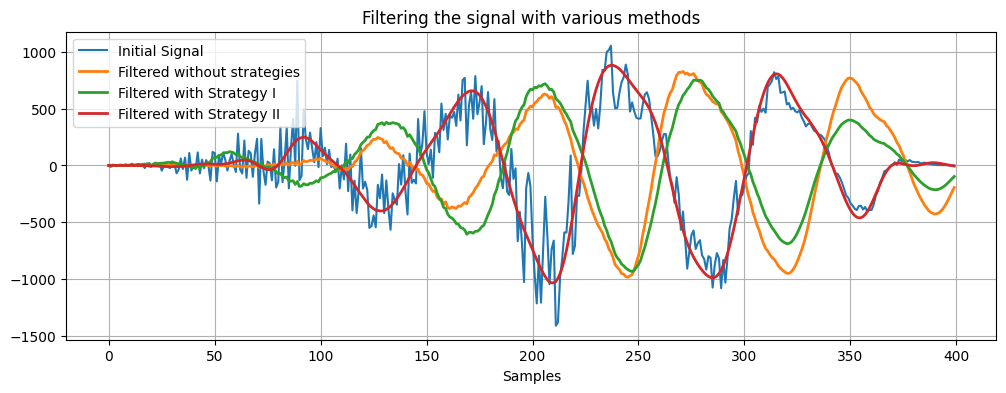

<u>**Απάντηση**</u>


Παρακάτω παρουσιάζουμε τα γραφήματα που παρουσιάζουν τα $3$ επιμέρους βήματα ξεχωριστά, δηλαδή ξεχωριστά το αποτέλεσμα του κάθε φιλτραρίσματος:

In [ ]:
m = io.loadmat('Lab3.mat')

# Φορτώνουμε τις μεταβλητές
fr1 = m['fr1'][0]
B = m['B'][0]

# Τυπώνουμε το αρχικό σήμα
fig1 = plt.figure(figsize=(12,4))
plt.title('Signal fr1')
plt.plot(fr1)
plt.grid(True)
plt.xlabel('Samples')
plt.show()

i. Φιλτράρετε απ΄ ευθείας το σήµα µε την εντολή sig.lfilter, όπως γνωρίζετε από προηγούμενα ερωτήματα.

<u>**Απάντηση**</u>

In [ ]:
# filtering the initial signal without using any strategy
y0 = # INSERT CODE HERE

plt.figure(figsize=(12,4))
plt.plot(fr1)
plt.plot(y0, linewidth=2)
plt.grid(True)
plt.xlabel('Samples')
plt.title('Filtering the initial signal without using any strategy')
plt.legend(['Initial Signal','Filtered without strategies'], loc='upper left')
plt.xlim(0, 400)
plt.ylim(-1500, 1500)
plt.show()

ii. Φιλτράρετε το σήμα ακολουθώντας τη στρατηγική Ι. Χρησιμοποιήστε τις συναρτήσεις fliplr, filter.

<u>**Απάντηση**</u>

In [ ]:
# filtering the initial signal using the first strategy
x2 =  # INSERT CODE HERE
x1n =  # INSERT CODE HERE
x2n =  # INSERT CODE HERE

y1 =  # INSERT CODE HERE

plt.figure(figsize=(12,4))
plt.plot(fr1)
plt.plot(y1, color=[0.9290, 0.6940, 0.1250], linewidth=2)
plt.grid(True)
plt.xlabel('Samples')
plt.title('Filtering the signal using the 1st Strategy')
plt.legend(['Initial Signal','Filtered with Strategy I'], loc= 'upper right')
plt.show()

iii. Φιλτράρετε το σήμα ακολουθώντας τη στρατηγική ΙΙ.

<u>**Απάντηση**</u>

In [ ]:
# filtering the initial signal using the second strategy
x2 =  # INSERT CODE HERE
x1n =  # INSERT CODE HERE
x2n =  # INSERT CODE HERE
y2 =  # INSERT CODE HERE

plt.figure(figsize=(12,4))
plt.plot(fr1)
plt.plot(y2, color=[0.4940, 0.1840, 0.5560], linewidth=2)
plt.grid(True)
plt.xlabel('Samples')
plt.title('Filtering the signal using the 2nd Strategy')
plt.legend(['Initial Signal','Filtered with Strategy II'], loc= 'upper left')
plt.show()

iv. Ας παρουσιάσουμε όλα τα αποτελέσματα μαζί σε ένα διάγραμμα. 

In [ ]:
# Final Comparison
plt.figure(figsize=(12,4))
plt.plot(fr1)
plt.plot(y0, linewidth=2)
plt.plot(y1, linewidth=2)
plt.plot(y2, linewidth=2)
plt.grid(True)
plt.xlabel('Samples')
plt.title('Filtering the signal with various methods')
plt.legend(['Initial Signal','Filtered without strategies','Filtered with Strategy I','Filtered with Strategy II'], loc='upper left')
plt.show()

v. Ποιά στρατηγική από τις τρείς επιλέγετε τελικά?

<u>**Απάντηση**</u>

---
---

# 3. Σχεδιασμός Notch Φίλτρων και Αποθορυβοποίηση Ηλεκτροκαρδιογραφήματος
Στο 2ο εργαστήριο, κληθήκατε να αποθορυβοποιήσετε ένα σήμα φωνής από ένα ημιτονοειδή θόρυβο στα $f_0 = 400$ Hz. Το φίλτρο που φτιάξατε με απλές εξισώσεις διαφορών ήταν μέτριας ποιότητας, μια και κατέστελλε μεγάλο τμήμα των χαμηλών συχνοτήτων. Σε αυτό το εργαστήριο θα μάθετε να σχεδιάζετε πολύ καλύτερης ποιότητας φίλτρα, τα οποία λέγονται **notch filters**, ή αλλιώς, **φίλτρα αποκοπής συγκεκριμένης συχνότητας**. 

---


(α') Τα notch φίλτρα που θα σχεδιάσετε θα είναι IIR, δηλ. θα αποτελούνται τόσο από πόλους, όσο και από μηδενικά. Ένα IIR notch φίλτρο θα μηδενίζει μια μόνο συγκεκριμένη συχνότητα $\omega_0$ ενός σήματος, αλλά θα έχει σχεδόν μοναδιαία απόκριση πλάτους σε όλες τις άλλες συχνότητες, με αποτέλεσμα να μην τις αλλοιώνει σχεδόν καθόλου. Η παραπάνω πρόταση περιγράφη την προδιαγραφή του φίλτρου μας. Ας δούμε πως μπορούμε να το σχεδιάσουμε, σε βήματα.

i. Έστω ότι η επιθμητή συχνότητα που θέλουμε να αφαιρέσουμε είναι η $\omega_0 = \pi/4$. Καλέστε τη συνάρτηση pezw2 βάζοντας δυο συζυγή μηδενικά στις συχνότητες $\omega_0 = \pm \pi/4$ ακριβώς επάνω στο μοναδιαίο κύκλο. Η συνάρτηση sig.convolve θα σας φανεί χρήσιμη. Εξετάστε την απόκριση πλάτους. Ικανοποιείται η προδιαγραφή του φίλτρου;

<u>**Απάντηση**</u>

In [ ]:
w0 =  # INSERT CODE HERE
num1 =  # INSERT CODE HERE - you can use sig.convolve
den1 =  # INSERT CODE HERE - you can use sig.convolve

# Group delay has issues here as well - do not worry
pezw2(num1, den1)

Γράψτε εδώ το σχόλιό σας σχετικά με το φίλτρο:

ii. Όπως παρατηρείτε στο προηγούμενο γράφημα εξετάζοντας την απόκριση πλάτους, το διάστημα συχνοτήτων $(-\pi/4, \pi/4)$ έχει πολύ χαμηλό πλάτος, ενώ έξω από αυτό το πλάτος είναι μεγαλύτερο της μονάδας. Ουσιαστικά βλέπετε το FIR φίλτρο που σχεδιάσετε εσείς στο 2ο εργαστήριο. Όμως, είπαμε - και βλέπετε στο γράφημα - δεν ικανοποιεί τις προδιαγραφές του φίλτρου. Πώς θα μπορούσαμε να "σηκώσουμε" τις τιμές της απόκρισης πλάτους στο διάστημα $(-\pi/4, \pi/4)$ κοντά στη μονάδα, αλλά και να μειωθούν οι τιμές της απόκρισης πλάτους γύρω από τις συχνότητες $\omega = \pm \pi$? Φυσικά εισάγοντας κάποιους πόλους! 

Καλέστε τη συνάρτηση pezw2 κρατώντας τα δυο μηδενικά που έχετε ήδη και βάζοντας επιπλέον δυο συζυγείς πόλους στις συχνότητες $\omega_0 = \pm \pi/4$ σε ακτίνα $r=0.6$ από το κέντρο του μιγαδικού επιπέδου. Η συνάρτηση np.convolve θα σας φανεί ξανά χρήσιμη. Ικανοποιείται η προδιαγραφή του φίλτρου;

<u>**Απάντηση**</u>

In [ ]:
w0 =  # INSERT CODE HERE
r =  # INSERT CODE HERE

num2 =  # INSERT CODE HERE - you can use sig.convolve
den2 =  # INSERT CODE HERE - you can use sig.convolve

# Group delay has issues here as well - do not worry
pezw2(num2, den2)

iii. Επαναλάβετε για $r=0.8$. Ικανοποιείται η προδιαγραφή του φίλτρου;

<u>**Απάντηση**</u>

In [ ]:
w0 =  # INSERT CODE HERE
r =  # INSERT CODE HERE

num3 = # INSERT CODE HERE - you can use sig.convolve
den3 = # INSERT CODE HERE - you can use sig.convolve

# Group delay has issues here as well - do not worry
pezw2(num3, den3)

Γράψτε εδώ το σχόλιό σας σχετικά με το φίλτρο:

iv. Πειραματιστείτε και παραδώστε ΕΝΑ ακόμα γράφημα της συνάρτησης pezw2, όπου οι πόλοι είναι κατάλληλα τοποθετημένοι ώστε να ικανοποιείται η προδιαγραφή του φίλτρου όσο γίνεται καλύτερα. Ποιά τιμή του $r$ δώσατε σε αυτούς;

<u>**Απάντηση**</u>

In [ ]:
w0 = # INSERT CODE HERE 
r = # INSERT CODE HERE

num4 = # INSERT CODE HERE - you can use sig.convolve
den4 = # INSERT CODE HERE - you can use sig.convolve

# Group delay has issues here as well - do not worry
pezw2(num4, den4)

Γράψτε εδώ τα σχόλιά σας σχετικά με το φίλτρο:


v. Υλοποιήστε ένα ημίτονο συχνότητας $\omega_0 = \pi/4$ διάρκειας $501$ δειγμάτων, ως

````python
n = [i for i in range(0, 501)]
x = [20*np.cos(w0*k) for k in n]
````


και περάστε το μέσα από το φίλτρο που υλοποιήσατε, με την εντολή sig.lfilter, ώστε να επιβεβαιώσετε τη λειτουργία του. 

Περιμένετε - θεωρητικά - το φίλτρο σας να μηδενίσει εντελώς αυτό το ημίτονο και στην έξοδό του να παρουσιαστεί ένα μηδενικό σήμα. Σχεδιάστε το γράφημα (εντολή plt.stem) του διακριτού σήματος πριν και μετά το φιλτράρισμα. Το φίλτρο σας μηδενίζει εντελώς το σήμα εισόδου? Αν όχι, γιατί; Εξηγήστε.

<u>**Απάντηση**</u>

In [ ]:
w0 = np.pi/4
r = 0.99
n = [i for i in range(0, 501)]
x = [20*np.cos(w0*k) for k in n]

num4 = # INSERT CODE HERE - you can use sig.convolve
den4 = # INSERT CODE HERE - you can use sig.convolve

y = # INSERT CODE HERE

plt.figure(figsize=(12, 6))
plt.stem(n, x, linefmt='black', markerfmt='o')
plt.stem(n, y, linefmt='blue', markerfmt='o')
plt.grid(True)
plt.legend(['Initial Signal','Filtered Signal'], loc="upper right")
plt.xlabel('Samples')
plt.show()


Γράψτε εδώ το σχόλιό σας:

---

(β') Τώρα που είστε experts :) στη σχεδίαση notch φίλτρων, δείξτε τις ικανότητές σας σε ένα πραγματικό πρόβλημα! 


Σίγουρα γνωρίζετε το πολύ συνηθισμένο τεστ που κάνουμε για την καρδιά μας, το περίφημο Ηλεκτροκαρδιογράφημα (ECG). Το ECG καταγράφει την ηλεκτρική δραστηριότητα που αλλάζει κατά τη διάρκεια ενός καρδιακού κύκλου. 

Η καταγραφή γίνεται - ενημερωτικά - ως εξής: ο καρδιολόγος τοποθετεί μεταλλικά ηλεκτρόδια σε διάφορες θέσεις στο σώμα, ώστε να "πιάσει" αυτά τα καρδιακά ηλεκτρικά σήματα. Δυστυχώς, τα ηλεκτρόδια καταγράφουν επίσης σήματα από άλλες ηλεκτρικές πηγές, συνήθως αρμονικές στα $50$ Hz, που είναι η συχνότητα των συσκευών που έχουμε στα σπίτι μας στην Ελλάδα (σε άλλες χώρες, η συχνότητα λειτουργίας τους είναι $60$ Hz). Σκοπός της άσκησης είναι να αφαιρέσετε μια τέτοια πραγματική ημιτονοειδής παρεμβολή με χρήση notch φίλτρων από ένα σήμα ηλεκτροκαρδιογραφήματος, ώστε να παραδώσετε στο γιατρό ένα καθαρό σήμα προς διάγνωση.

Το notch φίλτρο θα είναι της μορφής που είδατε νωρίτερα, δηλ. θα περιέχει 2 συζυγή μηδενικά ακριβώς πάνω στο μοναδιαίο κύκλο και 2 συζυγείς πόλους πολύ κοντά του, σε κατάλληλη συχνότητα. Άρα η συνάρτηση μεταφοράς του φίλτρου θα είναι
$$H(z) = \frac{(1 - e^{j\theta}z^{-1})(1 - e^{-j\theta}z^{-1})}{(1 - re^{j\theta}z^{-1})(1 - re^{-j\theta}z^{-1})}$$
με $\theta$ να είναι η γωνία θέσης των πόλων και μηδενικών, και $r$ η ακτίνα των πόλων.

Το ηλεκτροκαρδιογράφημα θα το παράξετε με την κλήση της συνάρτησης ECGmake που σας δίνεται. Η συνάρτηση αυτή διαβάζει δεδομένα από ένα αρχείο ECG.mat, που επίσης σας δίνεται. Το ηλεκτροκαρδιογράφημα θα είναι διαφορετικό για κάθε ομάδα φοιτητών, αφού η κλήση της ECGmake δέχεται ως όρισμα τον Α.Μ. σας στη σχολή. Για την ακρίβεια, η συνάρτηση αυτή συντάσσεται ως 

```python
def ECGmake(rnstring):
#
# ecgsig = vector of signal samples at fs samples/sec
# fs = sampling frequency
# fint = frequency of the interfering sinusoid (around 50 Hz)
# rnstring = your CSD/MATH/MED/PHYS Student Number (SN) as a string,
# e.g., '1367' or '6433' or '1230420'
#
# Note: if you are a group of two students, use only one student number.
    return ecgsig, fs, fint
```

Ακολουθήστε τα παρακάτω βήματα:

i. Καλέστε τη συνάρτηση ECGmake και καταγράψτε/παρατηρήστε τις τιμές για τη συχνότητα δειγματοληψίας $f_s$ και για τη συχνότητα ημιτονοειδούς παρεμβολής $f_{int}$, την οποία θέλετε να αφαιρέσετε.

<u>**Απάντηση**</u>

In [ ]:
ecgsig, fs, fint = # INSERT CODE HERE
print(fint[0])

Το ηλεκτροκαρδιογράφημα που παράξαμε έχει συχνότητα δειγματοληψίας $f_{s} = 8000$ Hz και συχνότητα ημιτονοειδούς παρεμβολής $f_{int}$ Hz όπως παραπάνω.

ii. Σχεδιάστε στο χαρτί το notch φίλτρο σας τοποθετώντας κατάλληλα πόλους και μηδενικά στο μιγαδικό επίπεδο. Εξηγήστε την επιλογή της συχνότητας $\omega_{int}$ που κάνατε για τους πόλους και τα μηδενικά σας, καθώς και την τιμή της ακτίνας $r$ για τους πόλους σας. Γράψτε τη συνάρτηση μεταφοράς $H(z)$ στην οποία καταλήξατε.

<u>**Απάντηση**</u>

iii. Καλέστε τη συνάρτηση pezw2 και βεβαιωθείτε ότι το φίλτρο σας έχει τις προδιαγραφές που πρέπει.

<u>**Απάντηση**</u>

In [ ]:
Wint = # INSERT CODE HERE

r = # INSERT CODE HERE
num = # INSERT CODE HERE - you can use sig.convolve
den = # INSERT CODE HERE - you can use sig.convolve

pezw2(num, den)

Θεωρούμε ότι το φίλτρο μας έχει τις προδιαγραφές που χρειάζεται, καθώς η απόκριση πλάτους σχεδόν
μηδενίζεται για $\omega = \pm \omega_{int}$ και για τις υπόλοιπες συχνότητες είναι σχεδόν μοναδιαία

iv. Εφαρμόστε το φίλτρο σας (εντολή sig.lfilter) στο σήμα ecgsig που σας επέστρεψε η ECGmake. Σχεδιάστε και παραδώστε (εντολή plt.plot) το σήμα ηλεκτροκαρδιογραφήματος πριν και μετά το φιλτράρισμα. Αν τα καταφέρετε σωστά, θα πάρετε ένα ηλεκτροκαρδιογράφημα όπως στο Σχήμα 5.

<center>
<div>
<img src="clearECG-eps.png" width="1000"/>
</div>
Σχήμα 5: Ηλεκτροκαρδιογράφημα μετά την αφαίρεση του θορύβου
</center>

<u>**Απάντηση**</u>

In [ ]:
ECG = ecgsig.T[0]
y = # INSERT CODE HERE

plt.figure(figsize=(12, 4))
plt.title('Noisy ECG')
plt.plot(ECG)
plt.grid(True)
plt.xlabel('Samples')
plt.ylabel('Initial Signal')

plt.figure(figsize=(12, 4))
plt.title('Clear ECG')
plt.plot(y)
plt.grid(True)
plt.xlabel('Samples')
plt.ylabel('Filtered Signal')

plt.show()

---
---

# 4. Συστήματα Ελάχιστης Φάσης στις Τηλεπικοινωνίες
Γνωρίζετε ότι μια εφαρμογή των συστημάτων ελάχιστης φάσης βρίσκεται στις τηλεπικοινωνίες και στην κινητή τηλεφωνία. Έστω ένα απλοποιημένο σύστημα κινητής τηλεφωνίας, όπου το σήμα φωνής $x[n]$ (πομπός) υπόκειται σε μεταβολές λόγω του καναλιού επικοινωνίας $h[n]$ (το οποίο θεωρείται ένα αιτιατό και ευσταθές ΓΧΑ σύστημα), λαμβάνεται από τον σταθμό βάσης (πάροχος τηλεφωνίας) για ``καθαρισμό'', και φτάνει τελικά στο ακουστικό του παραλήπτη στη μορφή $\hat{x}[n]$ (δέκτης), η οποία πρέπει να είναι πολύ κοντά στο αρχικό $x[n]$. Σε όρους επεξεργασίας σήματος, το κανάλι του παραδείγματός μας μοντελοποιείται ως:

$$H(z) = \frac{(1 - 1.25e^{j\pi/4}z^{-1})(1 - 1.25e^{-j\pi/4}z^{-1})}{(1 - 0.97e^{j3\pi/4}z^{-1})(1 - 0.97e^{-j3\pi/4}z^{-1})}$$

δηλ. αποτελείται από δυο πόλους και δυο μηδενικά, σε συζυγή ζεύγη. Ο πάροχος τηλεφωνίας λαμβάνει αρχικά το σήμα φωνής και προτού το στείλει στον δέκτη, ανιχνεύει το κανάλι $H(z)$, και προσπαθεί να ακυρώσει την επίδραση του επάνω στο σήμα φωνής του πομπού. Δυστυχώς, διαπιστώνει ότι το σύστημα $H(z)$ δεν έχει ευσταθές και αιτιατό αντίστροφο σύστημα, οπότε πρέπει να βρει μια άλλη λύση. 

---

Χρησιμοποιώντας τις συναρτήσεις sig.convolve, sig.lfilter, pezw2, wavefile.read, Audio, ακολουθήστε τα παρακάτω:

i. Παράγετε το γράφημα της pezw2 για το δοθέν σύστημα $H(z)$.

<u>**Απάντηση**</u>

In [ ]:
w0 = # INSERT CODE HERE
r = # INSERT CODE HERE - you can use sig.convolve

num1 = # INSERT CODE HERE - you can use sig.convolve
den1 = # INSERT CODE HERE - you can use sig.convolve

pezw2(num1, den1)

ii. Ας φορτώσουμε το αρχείο sampleLab3.wav που σας δίνεται, το οποίο είναι το σήμα φωνής που λαμβάνει ο πάροχος και πρέπει να παραδώσει καθαρό στον πελάτη-δέκτη. Ακούστε το, και δείτε το γράφημά του.

In [ ]:
fs, s = wavfile.read('./sampleLab3.wav')     # διαβάζουμε το συνοδευτικό wav αρχείο
s = s / (2**15)                              # κανονικοποίηση

Audio(s.T, rate=fs)                          # ακούμε! :)

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(s)
plt.grid(True)
plt.xlabel('Samples')
plt.title('Initial Signal')
plt.show()

iii. Βρείτε ένα άλλο σύστημα, $H_{min}(z)$, που να έχει την ίδια απόκριση πλάτους με το δοθέν σύστημα $H(z)$.  Εξηγήστε και γράψτε τη μαθηματική μορφή του παρακάτω. 

Καλέστε κατάλληλα τη συνάρτηση pezw2 για να απεικονίσετε τα γραφήματα αυτού του συστήματος. Βεβαιωθείτε ότι όντως έχει την ίδια απόκριση πλάτους με το $H(z)$.

<u>**Απάντηση**</u>

In [ ]:
w0 = # INSERT CODE HERE 
r = # INSERT CODE HERE 

num2 = # INSERT CODE HERE - you can use sig.convolve
den2 = # INSERT CODE HERE - you can use sig.convolve

pezw2(num2, den2)

iv. Καλέστε την pezw2 για να σας απεικονίσει το αντίστροφο σύστημα $H^i_{min}(z) = 1/H_{min}(z)$. Γράψτε παρακάτω πρώτα την πλήρη μαθηματική του μορφή.

<u>**Απάντηση**</u>

In [ ]:
pezw2(den2, num2)

v. Ακυρώστε *μερικώς* την επίδραση του συστήματος $H(z)$ φιλτράροντας το σήμα που σας δίνεται μέσα από το σύστημα $H^i_{min}(z)$ που βρήκατε.

<u>**Απάντηση**</u>

In [ ]:
y = # INSERT CODE HERE

vi. Ας σχεδιάσουμε τα δυο σήματα πριν και μετά το φιλτράρισμα. Ακούστε τα. Σχολιάστε.

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(s)
plt.grid(True)
plt.xlabel('Samples')
plt.title('Initial Signal')

plt.figure(figsize=(12, 4))
plt.plot(y)
plt.grid(True)
plt.xlabel('Samples')
plt.title('Filtered Signal')

plt.show()

In [ ]:
# το αρχικό
Audio(s.T, rate=fs)             # ακούμε! :)

In [ ]:
# το τελικό
Audio(y.T, rate=fs)             # ακούμε! :)

Γράψτε παρακάτω το σχόλιό σας.

---
---

### Για την παράδοση της άσκησης, παραδώστε συμπληρωμένο αυτό το *Python* αρχείο, με εκτελεσμένο κάθε κελί κώδικα, μετονομασμένο σε

### <center> Lab3_AM.ipynb

### Η παράδοση γίνεται μέσω e-mail στα
<br>

### <center> csd4390@csd.uoc.gr

### <center> και

### <center> csd4262@csd.uoc.gr

### Σε περίπτωση που έχετε ομάδα 2 ατόμων, το όνομα του αρχείο θα πρέπει να είναι 

### <center> Lab3_AM1_ΑΜ2.ipynb

### και πρέπει να αποσταλεί ΜΟΝΟ από ένα (οποιοδήποτε) μέλος της ομάδας.

## <center> Ανάθεση: 10/11/2023
## <center> Προθεσμία: 8/12/2023, 23:59:59